# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [1]:
from pandas_datareader import data as pdr

import plotly.express as px
from plotly import graph_objects
import yfinance as yf
yf.pdr_override()

import datetime as dt
import pandas as pd
import numpy as np

#### 1. Carregue os dados da tarefa anterior

In [2]:
df_yahoo = pd.read_csv('./dadosLimpos.csv', header=[0, 1], index_col=[0])
df_yahoo

Adj Close                               Close              \
                  AAPL         DIS        MSFT        AAPL         DIS   
Date                                                                     
2021-01-04  127.679993  177.679993  213.342026  129.410004  177.679993   
2021-01-05  129.258606  178.440002  213.547806  131.009995  178.440002   
2021-01-06  124.907555  179.119995  208.010666  126.599998  179.119995   
2021-01-07  129.169815  178.580002  213.930008  130.919998  178.580002   
2021-01-08  130.284714  178.690002  215.233459  132.050003  178.690002   
...                ...         ...         ...         ...         ...   
2021-12-23  174.995605  153.630005  330.754578  176.279999  153.630005   
2021-12-27  179.016113  152.800003  338.423340  180.330002  152.800003   
2021-12-28  177.983688  155.199997  337.237457  179.289993  155.199997   
2021-12-29  178.073044  154.869995  337.929260  179.380005  154.869995   
2021-12-30  176.901627  155.929993  335.330109  178.199997  155.929993   

                              High                                 Low  \
                  MSFT        AAPL         DIS        MSFT        AAPL   
Date                                                                     
2021-01-04  217.690002  133.610001  182.589996  223.000000  126.760002   
2021-01-05  217.899994  131.740005  180.339996  218.520004  128.429993   
2021-01-06  212.250000  131.050003  181.610001  216.490005  126.379997   
2021-01-07  218.289993  131.630005  179.949997  219.339996  127.860001   
2021-01-08  219.619995  132.630005  180.020004  220.580002  130.229996   
...                ...         ...         ...         ...         ...   
2021-12-23  334.690002  176.850006  154.190002  336.390015  175.270004   
2021-12-27  342.450012  180.419998  154.020004  342.480011  177.070007   
2021-12-28  341.250000  181.330002  156.500000  343.809998  178.529999   
2021-12-29  341.950012  180.630005  155.919998  344.299988  178.139999   
2021-12-30  339.320007  180.570007  157.070007  343.130005  178.089996   

                                          Open                          \
                   DIS        MSFT        AAPL         DIS        MSFT   
Date                                                                     
2021-01-04  174.729996  214.809998  133.520004  182.259995  222.529999   
2021-01-05  176.199997  215.699997  128.889999  176.199997  217.259995   
2021-01-06  177.279999  211.940002  127.720001  178.320007  212.169998   
2021-01-07  177.580002  213.710007  128.360001  179.500000  214.039993   
2021-01-08  176.600006  217.029999  132.429993  178.809998  218.679993   
...                ...         ...         ...         ...         ...   
2021-12-23  151.929993  332.730011  175.850006  152.320007  332.750000   
2021-12-27  151.399994  335.429993  177.089996  152.880005  335.459991   
2021-12-28  152.410004  340.320007  180.160004  152.619995  343.149994   
2021-12-29  154.179993  339.679993  179.330002  154.559998  341.299988   
2021-12-30  155.509995  338.820007  179.470001  155.710007  341.910004   

               Volume                      
                 AAPL       DIS      MSFT  
Date                                       
2021-01-04  143301900  13426600  37130100  
2021-01-05   97664900   7771800  23823000  
2021-01-06  155088000   7517800  35930700  
2021-01-07  109578200   7300800  27694500  
2021-01-08  105158200   7894500  22956200  
...               ...       ...       ...  
2021-12-23   68356600   6572400  19617800  
2021-12-27   74919600   7762000  19947000  
2021-12-28   79144300  12198700  15661500  
2021-12-29   62348900   8737000  15042000  
2021-12-30   59773000   7228400  15994500  

[251 rows x 18 columns]

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [3]:
ativos_media_movel = df_yahoo['Adj Close'].rolling(90, min_periods=1).mean()
ativos_media_movel_vertical = ativos_media_movel.stack().reset_index()
ativos_media_movel_vertical.columns = ['data', 'ativo', 'média móvel']

fig = px.line(ativos_media_movel_vertical, x="data", y="média móvel", color='ativo', template='plotly_white')
fig.show()

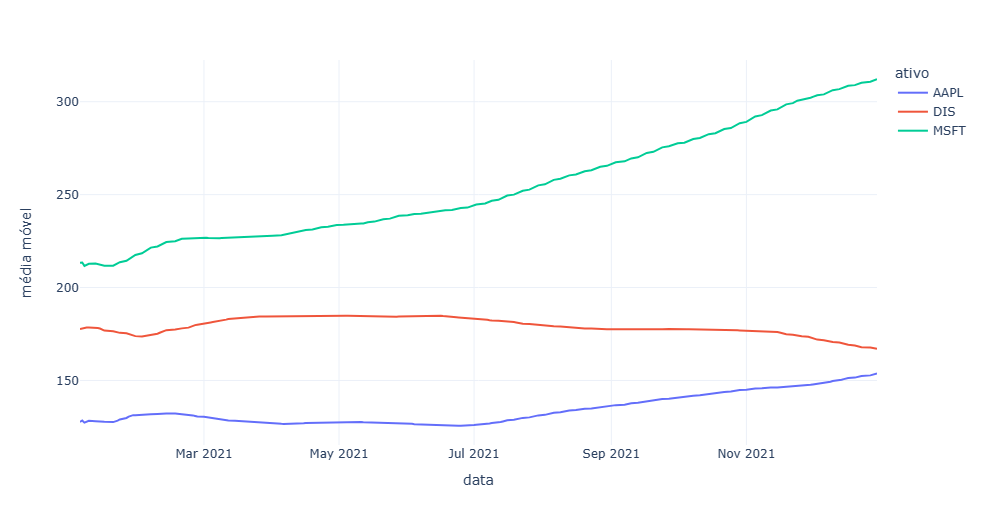

In [4]:
ativos_desvio_padrao = df_yahoo['Adj Close'].rolling(90, min_periods=1).std()
ativos_desvio_padrao_vertical = ativos_desvio_padrao.stack().reset_index()
ativos_desvio_padrao_vertical.columns = ['data', 'ativo', 'desvio_padrao']

fig = px.line(ativos_desvio_padrao_vertical, x="data", y="desvio_padrao", color='ativo', template='plotly_white')
fig.show()

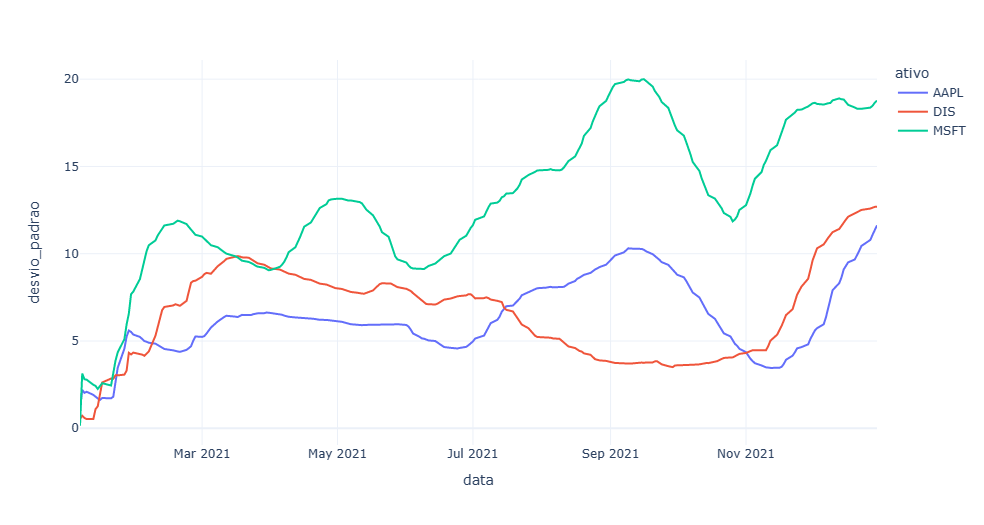

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [5]:
lista_indicadores = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
ativo = ['MSFT']*len(lista_indicadores)
colunas = list(zip(lista_indicadores, ativo))

msft = df_yahoo.loc['01/11/2022':, colunas]
msft.columns = lista_indicadores

msft.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,213.342026,217.690002,223.000000,214.809998,222.529999,37130100
2021-01-05,213.547806,217.899994,218.520004,215.699997,217.259995,23823000
2021-01-06,208.010666,212.250000,216.490005,211.940002,212.169998,35930700
2021-01-07,213.930008,218.289993,219.339996,213.710007,214.039993,27694500
2021-01-08,215.233459,219.619995,220.580002,217.029999,218.679993,22956200


In [6]:
graph = {
    'x': msft.index,
    'open': msft.Open,
    'close': msft.Close,
    'high': msft.High,
    'low': msft.Low,
    'type': 'candlestick',
    'name': 'MSFT',
    'showlegend': True
}

In [7]:
grafico = graph_objects.Figure(
    data=[graph],
    layout_title="Índice Microsoft",
    # layout=layout
)
grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

grafico


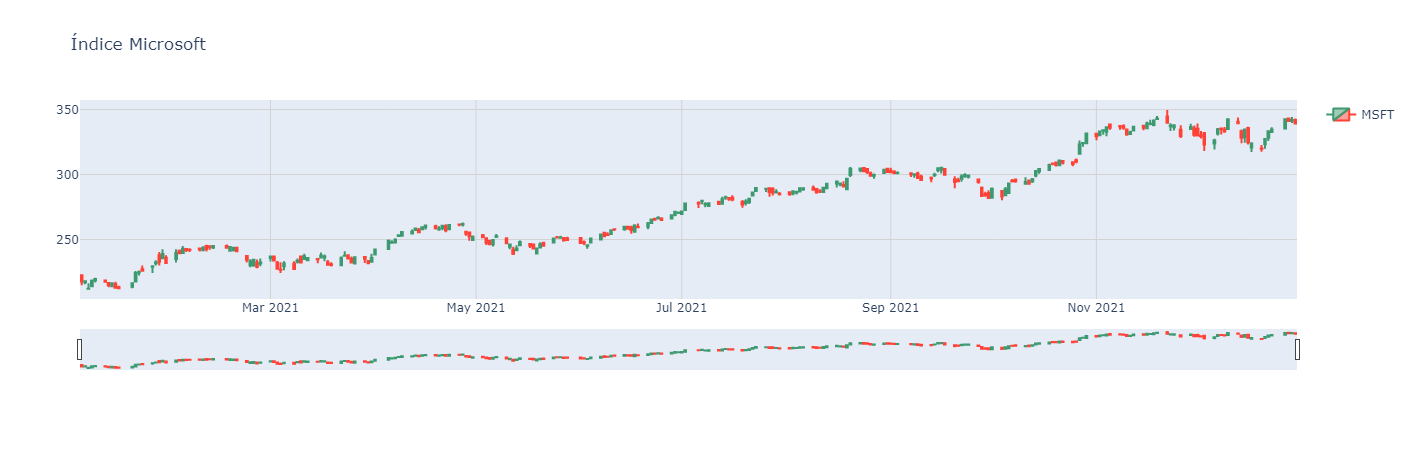